In [1]:
#from MuZeroParallel import MuZero as MuZeroP

from MuZero import MuZero

from GridWorldOption import GridWorldOption, GridWorldMacroAction


from GridWorld import GridWorld

from mcts.MCTS import MCTS
import numpy as np
import matplotlib.pyplot as plt

from random import choice
from copy import deepcopy
import time

import pickle
import pandas as pd

from matplotlib.pyplot import figure
import itertools
from tqdm import tqdm


In [2]:
MAP_NAME = './maps/den204d.map'

options = [
      GridWorldOption((0, 0),  {'all'}, 0, 0),
      GridWorldOption((0, 0),  {'all'}, 1, 1),
      GridWorldOption((0, 0),  {'all'}, 2, 2),
      GridWorldOption((0, 0),  {'all'}, 3, 3)
]

with open(MAP_NAME) as f:
    the_map = f.read()

In [3]:
SIMULATIONS = 40
SIM_FINISHS = 10000
GAMES = 500
ALPHA=0.01

In [4]:
env = GridWorld(the_map, SIM_FINISHS)
mu = MuZero(env, options)

In [5]:
start = time.time()
returns, argmax_returns = mu.learn(GAMES, SIMULATIONS, alpha=ALPHA)
end = time.time()

100%|██████████| 500/500 [12:56<00:00,  1.55s/it]  


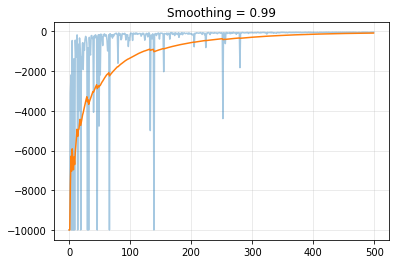

In [6]:
df = pd.DataFrame(data = {'value': np.array(returns[0:])})

SMOOTHING = 0.99
smooth = df.ewm(alpha=(1 - SMOOTHING)).mean()


plt.plot(df["value"], alpha=0.4)
plt.plot(smooth["value"])
plt.title("Smoothing = {}".format(SMOOTHING))
plt.grid(alpha=0.3)

plt.show()

In [7]:
options = [
    # primitives, (0,0) is meaningless
    GridWorldOption((0, 0),   {'all'}, 0, 0),
    GridWorldOption((0, 0),   {'all'}, 1, 1),
    GridWorldOption((0, 0),   {'all'}, 2, 2),
    GridWorldOption((0, 0),   {'all'}, 3, 3),
    GridWorldMacroAction(0, 3, 4),
    GridWorldMacroAction(1, 3, 5),
    GridWorldMacroAction(2, 3, 6),
    GridWorldMacroAction(3, 3, 7),
    
]

with open(MAP_NAME) as f:
    the_map = f.read()
    
env = GridWorld(the_map, SIM_FINISHS)
mu_ma = MuZero(env, options)

start_ma = time.time()
returns_ma, argmax_returns_ma = mu_ma.learn(GAMES, SIMULATIONS, alpha=ALPHA)
end_ma = time.time()

100%|██████████| 500/500 [07:44<00:00,  1.08it/s] 


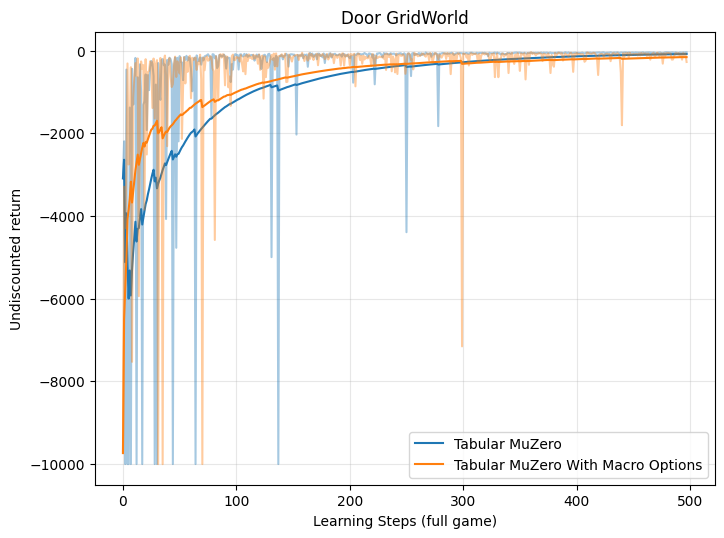

In [8]:
df = pd.DataFrame(data = {'value': np.array(returns[2:])})
df_ma = pd.DataFrame(data = {'value': np.array(returns_ma[2:])})

figure(figsize=(8, 6), dpi=100)

SMOOTHING = 0.99
smooth = df.ewm(alpha=(1 - SMOOTHING)).mean()
smooth_ma = df_ma.ewm(alpha=(1 - SMOOTHING)).mean()

plt.plot(df["value"], alpha=0.4, color='#1f77b4')
plt.plot(smooth["value"], color='#1f77b4', label='Tabular MuZero')
plt.plot(df_ma["value"], alpha=0.4, color='#ff7f0e')
plt.plot(smooth_ma["value"], color='#ff7f0e', label='Tabular MuZero With Macro Options')

plt.title("Door GridWorld".format(SMOOTHING))
plt.grid(alpha=0.3)

plt.xlabel("Learning Steps (full game)")
plt.ylabel("Undiscounted return")
plt.legend()
plt.show()